In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target[0]

0

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
model = LogisticRegression()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2)
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
model.score(X_test,y_test)

0.9666666666666667

In [10]:
target_index = 98
target_index_predicted = model.predict([iris.data[target_index]])
iris.target_names[target_index_predicted]

array(['versicolor'], dtype='<U10')

In [11]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

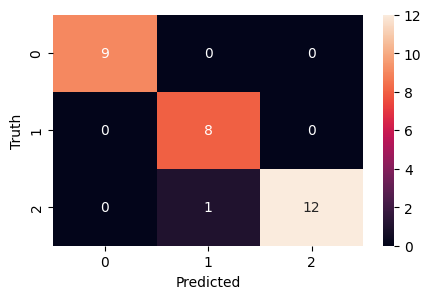

In [12]:
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
# Load the data into 2 different pandas dataframes. 
# X for the features
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# y for the targets
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [14]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
print(y)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [16]:
# Convert categorical data into dummy/indicator variables.
y = pd.get_dummies(y)
y


,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [17]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.25)

## Import and create the model
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn import tree
dt = DecisionTreeClassifier()

# Train our model with our training data.
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
#pre-pruning
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()  #model obj creation
#model.fit(x_train,y_train)
cv=GridSearchCV(model,parameter,scoring='accuracy')
cv.fit(x_train,y_train)

C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [19]:
best_model=cv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, max_features='sqrt')

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [39, 38, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 6.25\ngini = 0.499\nsamples = 73\nvalue = [0, 38, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.368\nsamples = 37\nvalue = [0, 28, 9]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.401\nsamples = 36\nvalue = [0, 10, 26]')]

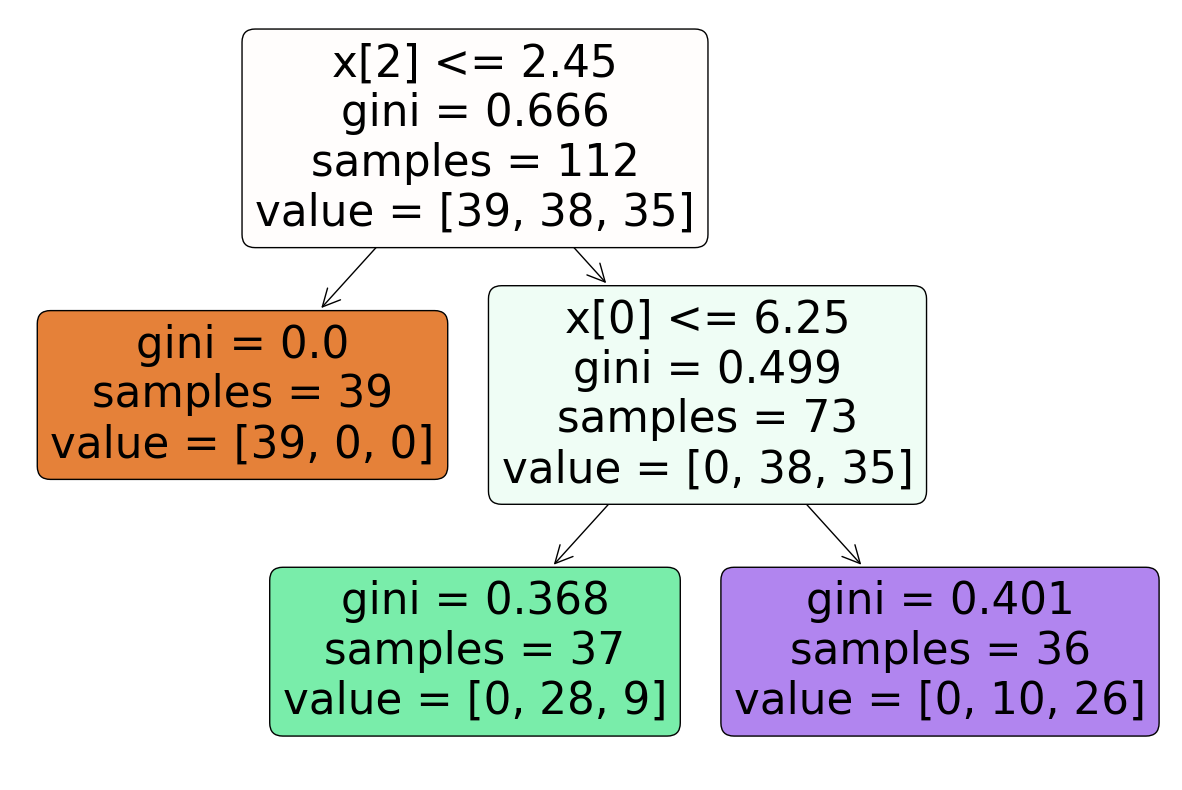

In [20]:
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)

In [21]:
#Post Pruning
#model=DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

[0.         0.00865801 0.00869361 0.01608318 0.25847288 0.3406333 ]


In [22]:
y_pred=cv.predict(iris.data)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1])

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,iris.target)
score

0.82

In [25]:
y_pred=clf.predict(iris.data)

In [26]:
score1=accuracy_score(y_pred,iris.target)

In [27]:
score1

0.3333333333333333

In [28]:
model1 = DecisionTreeClassifier()

In [29]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred1=model1.predict(iris.data)

In [31]:
score2=accuracy_score(y_pred1,iris.target)

In [32]:
score2

0.9733333333333334